#YİNELEMELİ SİNİR AĞI KATMANLARININ OLUŞTURULMASI

In [1]:
from keras.layers import SimpleRNN

In [2]:
from keras.models import Sequential
from keras.layers import Embedding

###Örnek 1: Bir RNN katmanı

In [3]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


###Örnek 2: Boyutlandırılmış RNN katmanı

In [4]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences= True))#sequence nin boyutunuda dönmüş olacak şimdi.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


###Örnek 3: Ardışık RNN katmanları

In [5]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences= True))#sequence nin boyutunuda dönmüş olacak şimdi.
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32, return_sequences= True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


#IMDB VERİS KÜMESİNİ HAZIRLAMAK

IMDB: Internet Movie Database(Internet Film Veritabanı)

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [7]:
num_features = 1000
maxlen = 500
batch_size = 32

In [8]:
print('Load data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_features)


print(len(input_train), 'Eğitim Dizisi', input_train.shape)
print(len(input_test), 'Test Dizisi', input_test.shape)

Load data...
17465344/17464789 [==============================] - 0s 0us/step
25000 Eğitim Dizisi (25000,)
25000 Test Dizisi (25000,)


In [9]:
#
print('Pad sequence (sample x train)')
#Maksimum uzunluğa göre girişleri ayarlıyoruz. input test ve inpu train i ayarlamamız gerekiyordu.

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)


print(len(input_train), 'Eğitim dizisi', input_train.shape)
print(len(input_test), 'test dizisi', input_test.shape)

Pad sequence (sample x train)
25000 Eğitim dizisi (25000, 500)
25000 test dizisi (25000, 500)


##EMBEDDING VE SimpleRNN Katmalarının Eğitilmesi

In [10]:
 #Katmanlarımızı oluşturalım. 
 from keras.layers import Dense
 from keras import layers

##Basit RNN ile Modelleme

In [11]:
model = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
#Çıkış katmanına bir aktivasyon uyguluyoruz.
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


##Basit LSTM İle Modelleme

In [20]:
model = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
#Çıkış katmanına bir aktivasyon uyguluyoruz.
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


#Modelin Derlenmesi RNN

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#Tüm epoch lardaki history sini oluşturalım e eğitme işlemini gerçekleştirelim. imput train ile y train eğiilcek yani.
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                   validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 8s 49ms/step - loss: 0.5587 - accuracy: 0.7297 - val_loss: 0.4602 - val_accuracy: 0.8106
Epoch 2/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3959 - accuracy: 0.8314 - val_loss: 0.4277 - val_accuracy: 0.7992
Epoch 3/10
 62/157 [==========>...................] - ETA: 3s - loss: 0.3622 - accuracy: 0.8502

KeyboardInterrupt: ignored

#Modelin Derlenmesi LSTM

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#Tüm epoch lardaki history sini oluşturalım e eğitme işlemini gerçekleştirelim. imput train ile y train eğiilcek yani.
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                   validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 8s 48ms/step - loss: 0.5586 - accuracy: 0.7171 - val_loss: 0.6009 - val_accuracy: 0.6918
Epoch 2/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3964 - accuracy: 0.8311 - val_loss: 0.4416 - val_accuracy: 0.8002
Epoch 3/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3589 - accuracy: 0.8486 - val_loss: 0.5921 - val_accuracy: 0.7450
Epoch 4/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3418 - accuracy: 0.8579 - val_loss: 0.3470 - val_accuracy: 0.8564
Epoch 5/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3319 - accuracy: 0.8640 - val_loss: 0.4263 - val_accuracy: 0.8256
Epoch 6/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3195 - accuracy: 0.8677 - val_loss: 0.3420 - val_accuracy: 0.8560
Epoch 7/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3156 - accuracy: 0.8673 - val_loss: 0.3478 - val_accuracy: 0.8528

##SONUÇLARIN ÇİZDİRİLMESİ

In [13]:
import matplotlib.pyplot as plt

##RNN TABLO ÇİZDİRME

In [14]:
#eğitim sırasındaki tüm değerleri alıcaz.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [15]:
epochs = range(1, len(acc)+1)

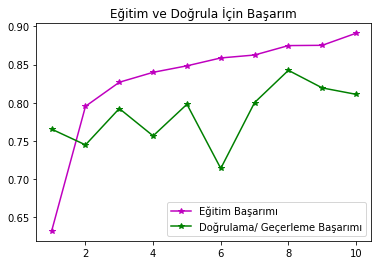

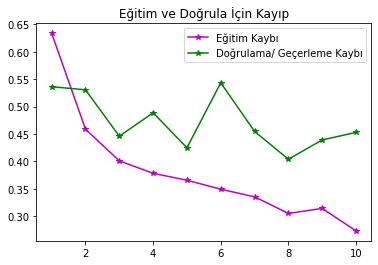

In [16]:
plt.plot(epochs, acc, 'm*-', label = 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label = 'Doğrulama/ Geçerleme Başarımı')
plt.title('Eğitim ve Doğrula İçin Başarım')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label = 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label = 'Doğrulama/ Geçerleme Kaybı')
plt.title('Eğitim ve Doğrula İçin Kayıp')
plt.legend()

In [17]:
print(acc, 'Eğitim Başarımları')

[0.6322000026702881, 0.7953000068664551, 0.8267999887466431, 0.8398000001907349, 0.8482999801635742, 0.8586000204086304, 0.8624500036239624, 0.8748000264167786, 0.8751500248908997, 0.8909500241279602] Eğitim Başarımları


##LSTM TABLO ÇİZDİRME

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
epochs = range(1, len(acc)+1)

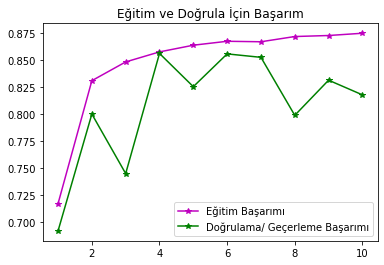

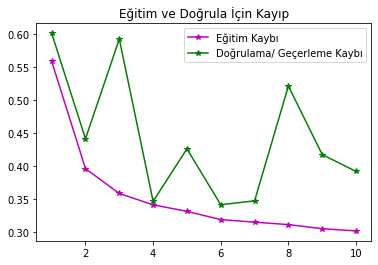

In [24]:
plt.plot(epochs, acc, 'm*-', label = 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label = 'Doğrulama/ Geçerleme Başarımı')
plt.title('Eğitim ve Doğrula İçin Başarım')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label = 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label = 'Doğrulama/ Geçerleme Kaybı')
plt.title('Eğitim ve Doğrula İçin Kayıp')
plt.legend()

In [25]:
print(acc, 'Eğitim Başarımları')

[0.7171000242233276, 0.8311499953269958, 0.848550021648407, 0.8578500151634216, 0.8640499711036682, 0.8676999807357788, 0.8672500252723694, 0.8720999956130981, 0.8730499744415283, 0.8751500248908997] Eğitim Başarımları
